# PARTIE I : NUMPY

### IMPORTATION

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### EXERCICE 1 : DÉCOUVERTE

In [11]:
a = np.arange(10)
print(a)

type(a)

L = np.arange(2,15,3)
print(L)

p1 = np.array([1,2,3,4])
print(p1)

p2 = np.array([5,6,7,8])

print(p1 + p2)

[0 1 2 3 4 5 6 7 8 9]
[ 2  5  8 11 14]
[1 2 3 4]
[ 6  8 10 12]


### EXERCICE 2 : COMPARAISON ARANGE - LINESPACE

In [12]:
help(np.arange)

Help on built-in function arange in module numpy:

arange(...)
    arange([start,] stop[, step,], dtype=None, *, like=None)
    
    Return evenly spaced values within a given interval.
    
    ``arange`` can be called with a varying number of positional arguments:
    
    * ``arange(stop)``: Values are generated within the half-open interval
      ``[0, stop)`` (in other words, the interval including `start` but
      excluding `stop`).
    * ``arange(start, stop)``: Values are generated within the half-open
      interval ``[start, stop)``.
    * ``arange(start, stop, step)`` Values are generated within the half-open
      interval ``[start, stop)``, with spacing between values given by
      ``step``.
    
    For integer arguments the function is roughly equivalent to the Python
    built-in :py:class:`range`, but returns an ndarray rather than a ``range``
    instance.
    
    When using a non-integer step, such as 0.1, it is often better to use
    `numpy.linspace`.
    
    S

In [14]:
help(np.linspace)

Help on _ArrayFunctionDispatcher in module numpy:

linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
    Return evenly spaced numbers over a specified interval.
    
    Returns `num` evenly spaced samples, calculated over the
    interval [`start`, `stop`].
    
    The endpoint of the interval can optionally be excluded.
    
    .. versionchanged:: 1.16.0
        Non-scalar `start` and `stop` are now supported.
    
    .. versionchanged:: 1.20.0
        Values are rounded towards ``-inf`` instead of ``0`` when an
        integer ``dtype`` is specified. The old behavior can
        still be obtained with ``np.linspace(start, stop, num).astype(int)``
    
    Parameters
    ----------
    start : array_like
        The starting value of the sequence.
    stop : array_like
        The end value of the sequence, unless `endpoint` is set to False.
        In that case, the sequence consists of all but the last of ``num + 1``
        evenly spaced samples, s

### EXERCICE 3 : TRACAGE DE SIN(X)

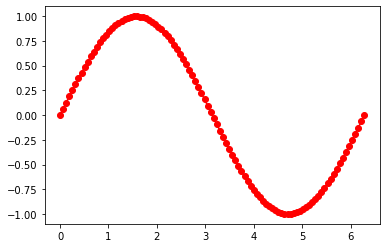

In [19]:
x = np.linspace(0, 2*np.pi, 100) #Générer 100 points entre 0 et 2pi
y = np.sin(x)
plt.plot(x,y,'ro-')
plt.show()

### EXERCICE 4 : TRACAGE DE SIN(X) AVEC UN PAS

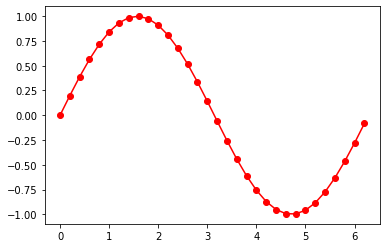

In [18]:
x = np.arange(0, 2*np.pi, 0.2) #Générer 100 points entre 0 et 2pi
y = np.sin(x)
plt.plot(x,y,'ro-')
plt.show()

# PARTIE II : CADRE APPLICATIF DE NUMPY

### EXERCICE 1

In [ ]:
with open("TP4_2.data",'r') as file:
    txt = np.genfromtxt(file, delimiter=',')

print("Données chargées :\n", txt[:5])
print("\nType des données : ",end="")
print(txt.dtype)
print("\nDimensions des données :", txt.shape)

Données chargées :
 [[1.4 0.2 5.1 3.5]
 [1.4 0.2 4.9 3. ]
 [1.3 0.2 4.7 3.2]
 [1.5 0.2 4.6 3.1]
 [1.4 0.2 5.  3.6]]

Type des données : float64

Dimensions des données : (150, 4)


### EXERCICE 2

C:\Users\jgoth\AppData\Local\Temp\ipykernel_14660\2065246537.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = axis.scatter(


Text(0.5, 0, 'Axe Z')

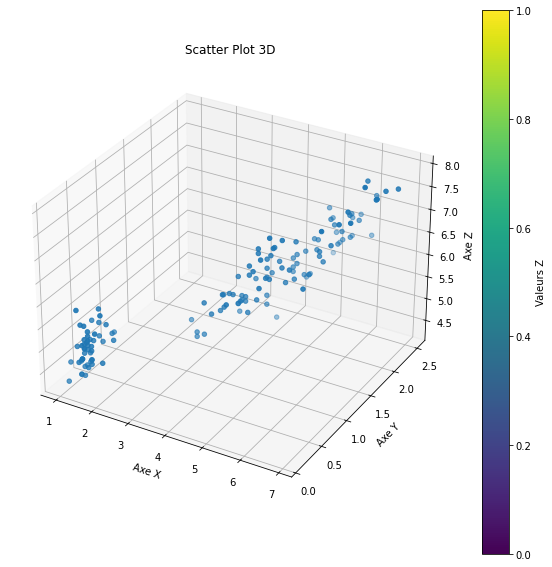

In [55]:
fig = plt.figure(figsize=(10,10))

axis = fig.add_subplot(111, projection='3d')
scatter = axis.scatter(
    txt[:,0],
    txt[:,1],
    txt[:,2],
    cmap='plasma'
)

cbar = plt.colorbar(scatter, ax=axis)
cbar.set_label('Valeurs Z')

axis.set_title("Scatter Plot 3D")
axis.set_xlabel("Axe X")
axis.set_ylabel("Axe Y")
axis.set_zlabel("Axe Z")


### EXERCICE 3

In [34]:
moyenne = np.mean(txt[:,0])
print("Moyenne de la première colonne : ", moyenne)

Moyenne de la première colonne :  3.758666666666666


### EXERCICE 3 (.2 ?)

In [36]:
#Calculer l'écart type de la première colonne
std = np.std(txt[:,0])
print(std)

#Moyenne de chaque colonne
moyennes = np.mean(txt, axis=0)
print(moyennes)

1.7585291834055212
[3.75866667 1.19866667 5.84333333 3.054     ]


### EXERCICE 4

In [ ]:
#Normaliser txt, soustraire moyenne et diviser par std
txt_norm = (txt - moyennes) / std

### EXERCICE 4 (.2 ?)

In [41]:
def normalisation(data):
    moyennes = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    return (data - moyennes) / std

### EXERCICE 5

In [42]:
datanorm = normalisation(txt)

### EXERCICE 6

In [44]:
datanorm_transpose = datanorm.T

### EXERCICE 7

In [45]:
n = datanorm.shape[0]
covariance = np.dot(datanorm_transpose, datanorm) / n
print(covariance.shape)

covariance = np.cov(datanorm, rowvar=False)
print(covariance.shape)

(4, 4)
(4, 4)


### EXERCICE 8

In [52]:
#Valeur propre et vecteur propre
valeurs_propres, vecteurs_propres = np.linalg.eig(covariance)
print("Valeurs propres : ", valeurs_propres)
print("Vecteurs propres : ", vecteurs_propres)

Valeurs propres :  [2.93035378 0.02074601 0.14834223 0.92740362]
Vecteurs propres :  [[ 0.58125401  0.80115427  0.14089226  0.02109478]
 [ 0.56561105 -0.52354627  0.6338014   0.06541577]
 [ 0.52237162 -0.26199559 -0.72101681  0.37231836]
 [-0.26335492  0.12413481  0.24203288  0.92555649]]


### EXERCICE 9

In [51]:
#Trier les vecteurs propres selon les valeurs propres
indices = np.argsort(valeurs_propres)[::-1]
print(indices)

[0 3 2 1]


### EXERCICE 10

In [50]:
# Matrice pca des deux premieres colonnes de vecteurs propres triées
pca = vecteurs_propres[:, indices[:2]]
print(pca)

[[ 0.58125401  0.02109478]
 [ 0.56561105  0.06541577]
 [ 0.52237162  0.37231836]
 [-0.26335492  0.92555649]]


### EXERCICE 11

In [53]:
projecteddata = np.dot(datanorm, pca)

C:\Users\jgoth\AppData\Local\Temp\ipykernel_14660\459742002.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = axis.scatter(


Text(0.5, 0, 'Axe Z')

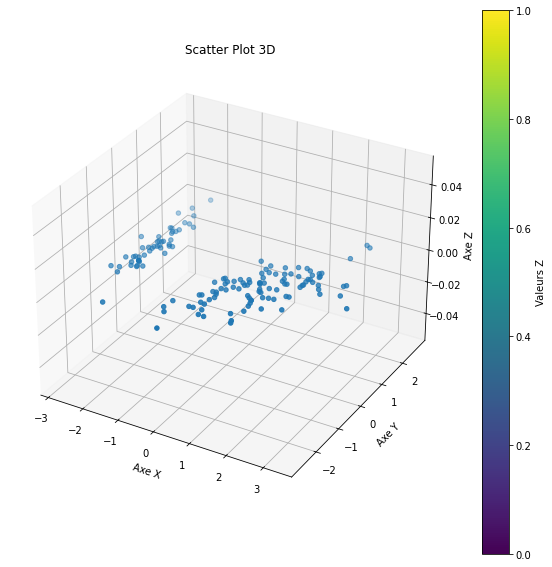

In [56]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,10))
axis = fig.add_subplot(111, projection='3d')
scatter = axis.scatter(
    projecteddata[:,0],
    projecteddata[:,1],
    cmap='plasma'
)

cbar = plt.colorbar(scatter, ax=axis)
cbar.set_label('Valeurs Z')

axis.set_title("Scatter Plot 3D")
axis.set_xlabel("Axe X")
axis.set_ylabel("Axe Y")
axis.set_zlabel("Axe Z")
